In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.2.0
	• tf.keras version: 2.3.0-tf
	• GPU device not found. Running on CPU


In [2]:
dataset, dataset_info = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteXZT7WO/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteXZT7WO/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [3]:
# Checking the type of dataset
print('dataset has type:', type(dataset))

dataset has type: <class 'dict'>


In [4]:
# Printing the keys of the dataset dictionary
print('\nThe keys of dataset are:', list(dataset.keys()))


The keys of dataset are: ['test', 'train']


In [0]:
# Splitting dataset into training data and testing data
training_set, test_set = dataset['train'], dataset['test']

In [6]:
dataset_info.features['image']

Image(shape=(28, 28, 1), dtype=tf.uint8)

In [7]:
dataset_info.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=10)

In [8]:
dataset_info.splits['train']

<tfds.core.SplitInfo num_examples=60000>

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [0]:
shape_images = dataset_info.features['image'].shape
num_classes = dataset_info.features['label'].num_classes

num_training_examples  = dataset_info.splits['train'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

In [0]:
# Creating Pipeline
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

batch_size = 64

training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)
testing_batches = test_set.cache().batch(batch_size).map(normalize).prefetch(1)

In [20]:
# Adding layers to model 
layer_neurons=[512,256,128,64,32]
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
for i in layer_neurons:
    model.add(tf.keras.layers.Dense(i,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compilin model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
for image_batch,label_batch in training_batches.take(1):
    loss,acc=model.evaluate(image_batch,label_batch)
print("Loss and Accuracy before training model")
print("loss : {:.3%}".format(loss))
print("Accuracy : {:.3%}".format(acc))

2/2 [==============================] - 0s 3ms/step - loss: 2.3235 - accuracy: 0.0938
Loss and Accuracy before training model
loss : 232.347%
Accuracy : 9.375%


In [17]:
#Training model
EPOCHS=5
model.fit(training_batches,epochs=EPOCHS)


Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.5145 - accuracy: 0.8145
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3690 - accuracy: 0.8643
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3319 - accuracy: 0.8793
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.3077 - accuracy: 0.8855
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.2919 - accuracy: 0.8916


In [18]:
for image_batch,label_batch in training_batches.take(1):
    loss,acc=model.evaluate(image_batch,label_batch)
print("Loss and Accuracy of model after being trained using training set")
print("loss : {:.3%}".format(loss))
print("Accuracy : {:.3%}".format(acc))

2/2 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8438
Loss and Accuracy of model after being trained using training set
loss : 35.975%
Accuracy : 84.375%


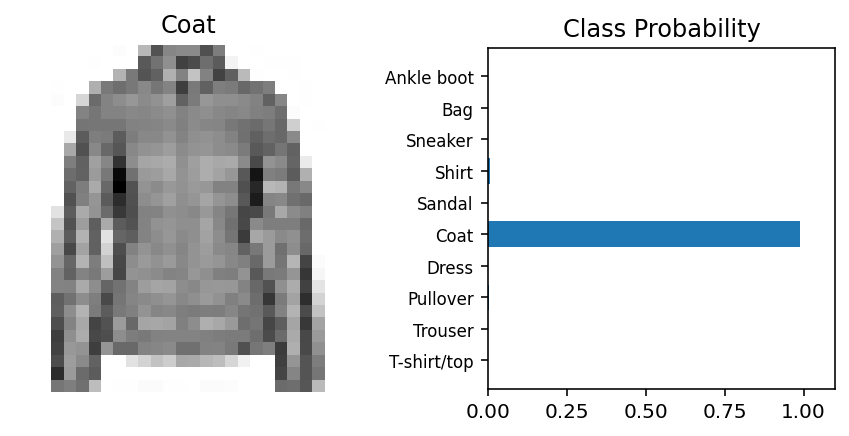

In [19]:
#Prediction
for image_batch, label_batch in testing_batches.take(1):
    ps = model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
    first_label = label_batch.numpy()[0]

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax1.set_title(class_names[first_label])
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(class_names, size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()